In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sweetviz as sv

%matplotlib inline

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# os.chdir(r'/content/drive/MyDrive/higgs boson/')

In [4]:
# To display all columns:
pd.pandas.set_option('display.max_columns', None)

In [5]:
# Creating Data folder in order to store data
if not os.path.exists('../data/'):
    os.mkdir('../data/')
    os.mkdir('../data/external')
    os.mkdir('../data/interim')
    os.mkdir('../data/processed')
    os.mkdir('../data/raw')

## Reading Data:

In [6]:
# For running in google colab:
# df = pd.read_csv(r'training.csv', na_values=-999.00)
# df_test = pd.read_csv(r'test.csv', na_values=-999.00)


# For reading Data from local system:
df = pd.read_csv(r'../data/raw/training.csv', na_values=-999.00)
df_test = pd.read_csv(r'../data/raw/test.csv', na_values=-999.00)

# Storing the event ids in variable
train_event_id, test_event_id = df['EventId'], df_test['EventId']

# Removing event ids from both dataframes
df.drop(columns='EventId', inplace=True)
df_test.drop(columns='EventId', inplace=True)

### Converting to categorical:

In [7]:
# df.Label = df.Label.astype('category')   # Gives error on running sweetviz EDA

## Displaying data:

In [8]:
df.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,125.157,0.879,1.414,NaN,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226,2.233584,b
2,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,197.814,3.776,1.414,NaN,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251,2.347389,b
3,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,0.414,75.968,2.354,-1.285,NaN,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,5.446378,b
4,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,57.983,1.056,-1.385,NaN,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,6.245333,b


In [9]:
df_test.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,NaN,79.589,23.916,3.036,NaN,NaN,NaN,0.903,3.036,56.018,1.536,-1.404,NaN,22.088,-0.540,-0.609,33.930,-0.504,-1.511,48.509,2.022,98.556,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000
1,106.398,67.490,87.949,49.994,NaN,NaN,NaN,2.048,2.679,132.865,1.777,-1.204,NaN,30.716,-1.784,3.054,54.574,-0.169,1.795,21.093,-1.138,176.251,1,47.575,-0.553,-0.849,NaN,NaN,NaN,47.575
2,117.794,56.226,96.358,4.137,NaN,NaN,NaN,2.755,4.137,97.600,1.096,-1.408,NaN,46.564,-0.298,3.079,51.036,-0.548,0.336,19.461,-1.868,111.505,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
3,135.861,30.604,97.288,9.104,NaN,NaN,NaN,2.811,9.104,94.112,0.819,-1.382,NaN,51.741,0.388,-1.408,42.371,-0.295,2.148,25.131,1.172,164.707,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
4,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,721.552,1.713,-0.913,0.004,45.087,-1.548,1.877,77.252,-1.913,2.838,22.200,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


## Dropping Duplicates in train dataset if any:

In [10]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [11]:
df.shape

(250000, 32)

# Data exploration:

## Imbalenced or not?

**Slight Imbalance** An imbalanced classification problem where the distribution of examples is uneven by a small amount in the training dataset (e.g. 4:6)

In this case, the 2:1 imbalence is something that cannot be ignored. So lets try with both imbalenced & balenced data.

In [12]:
# Checking if target variable is imbalenced or not?
df.Label.value_counts()

b    164333
s     85667
Name: Label, dtype: int64

## info() & describe():

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DER_mass_MMC                 211886 non-null  float64
 1   DER_mass_transverse_met_lep  250000 non-null  float64
 2   DER_mass_vis                 250000 non-null  float64
 3   DER_pt_h                     250000 non-null  float64
 4   DER_deltaeta_jet_jet         72543 non-null   float64
 5   DER_mass_jet_jet             72543 non-null   float64
 6   DER_prodeta_jet_jet          72543 non-null   float64
 7   DER_deltar_tau_lep           250000 non-null  float64
 8   DER_pt_tot                   250000 non-null  float64
 9   DER_sum_pt                   250000 non-null  float64
 10  DER_pt_ratio_lep_tau         250000 non-null  float64
 11  DER_met_phi_centrality       250000 non-null  float64
 12  DER_lep_eta_centrality       72543 non-null   float64
 13 

In [14]:
df.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,211886.000000,250000.000000,250000.000000,250000.000000,72543.000000,72543.000000,72543.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,72543.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,150087.000000,150087.000000,150087.000000,72543.000000,72543.000000,72543.000000,250000.000000,250000.000000
mean,121.858528,49.239819,81.181982,57.895962,2.403735,371.783360,-0.821688,2.373100,18.917332,158.432217,1.437609,-0.128305,0.458290,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,73.064591,1.646767
std,57.298157,35.344886,40.828691,63.655682,1.742226,397.699325,3.584362,0.782911,22.273494,115.706115,0.844743,1.193585,0.398681,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,60.662276,1.784546,1.813385,31.985782,2.031743,1.816950,98.015662,1.875103
min,9.044000,0.000000,6.329000,0.000000,0.000000,13.602000,-18.066000,0.208000,0.000000,46.104000,0.047000,-1.414000,0.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,30.000000,-4.499000,-3.142000,30.000000,-4.500000,-3.142000,0.000000,0.001502
25%,91.885250,19.241000,59.388750,14.068750,0.882500,111.977000,-2.629000,1.810000,2.841000,77.550000,0.883000,-1.371000,0.004000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,44.422500,-1.342000,-1.584000,37.312000,-1.612000,-1.576500,0.000000,0.018636
50%,112.406000,46.524000,73.752000,38.467500,2.107000,225.885000,-0.244000,2.491500,12.315500,120.664500,1.280000,-0.356000,0.454000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,65.561000,0.000000,-0.033000,47.902000,-0.010000,-0.002000,40.512500,1.156188
75%,135.482000,73.598000,92.259000,79.169000,3.690000,478.226000,0.958000,2.961000,27.591000,200.478250,1.777000,1.225000,0.879000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,103.342000,1.336000,1.562000,66.637000,1.589500,1.576000,109.933750,2.404128
max,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


## Shape of Data:

In [15]:
# Finding shape of training
print('train -', df.shape)

# Finding shape of test
print('test -', df_test.shape)

train - (250000, 32)
test - (550000, 30)


In [16]:
# [(i, df[i].isnull().sum()/len(df[i])) for i in df.columns]

###  O/P Columns:

In [17]:
# Finding the 2 extra columns in the train dataset:
set(df.columns) - set(df_test.columns)

{'Label', 'Weight'}

### Heatmap contruction:

<AxesSubplot:>

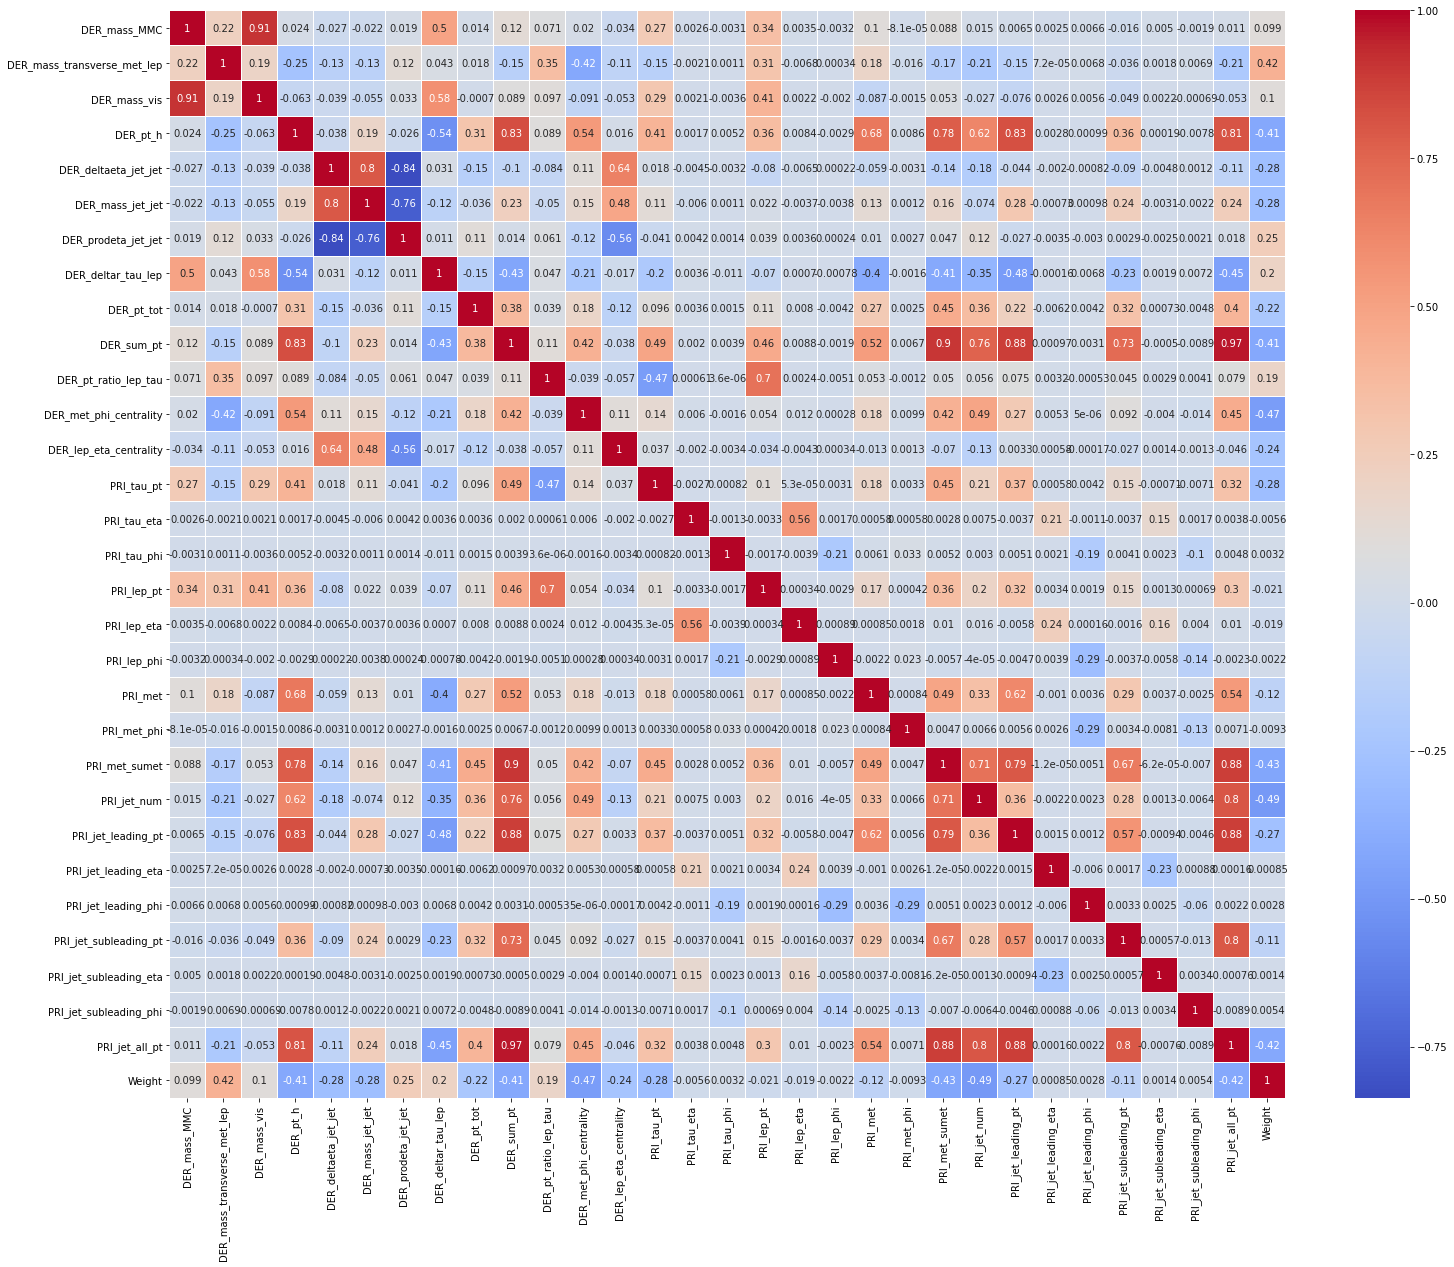

In [18]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, linewidth=1)

### Finding rows with 70% null data:

In [19]:
df.isna().sum()

DER_mass_MMC                    38114
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           177457
DER_mass_jet_jet               177457
DER_prodeta_jet_jet            177457
DER_deltar_tau_lep                  0
DER_pt_tot                          0
DER_sum_pt                          0
DER_pt_ratio_lep_tau                0
DER_met_phi_centrality              0
DER_lep_eta_centrality         177457
PRI_tau_pt                          0
PRI_tau_eta                         0
PRI_tau_phi                         0
PRI_lep_pt                          0
PRI_lep_eta                         0
PRI_lep_phi                         0
PRI_met                             0
PRI_met_phi                         0
PRI_met_sumet                       0
PRI_jet_num                         0
PRI_jet_leading_pt              99913
PRI_jet_leading_eta             99913
PRI_jet_leading_phi             99913
PRI_jet_subl

In [20]:
# Finding all columns in train with NAN values:
col_cnt = df.count()

null_train = col_cnt[col_cnt/col_cnt.max()*100 < 30]
null_train.index

Index(['DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet',
       'DER_lep_eta_centrality', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi'],
      dtype='object')

In [21]:
# Finding all columns in test with NAN values:
col_cnt_test = df_test.count()

null_test = col_cnt_test[col_cnt_test/col_cnt_test.max()*100 < 30][:-2]
null_test.index

Index(['DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet',
       'DER_lep_eta_centrality', 'PRI_jet_subleading_pt'],
      dtype='object')

In [22]:
#  null_train & null_test columns
null_mismatch = set(null_train.index) - set(null_test.index)
null_mismatch

{'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi'}

In [23]:
null_union_70 = list(set(null_train.index).union(set(null_test.index)))
null_union_70

['PRI_jet_subleading_eta',
 'DER_lep_eta_centrality',
 'DER_prodeta_jet_jet',
 'DER_mass_jet_jet',
 'PRI_jet_subleading_pt',
 'DER_deltaeta_jet_jet',
 'PRI_jet_subleading_phi']

### Checking if the same set of columns are missing or not:

From our analysis it is clear that the same set of columns are missing as `250000 - 72543 = 177457`. So we will add a indicator column during imputation. 

In [24]:
# Columns with 70% data missing
df[ (df[null_union_70[0]].isna()) & (df[null_union_70[1]].isna()) & (df[null_union_70[2]].isna()) &
    (df[null_union_70[3]].isna()) & (df[null_union_70[4]].isna()) & (df[null_union_70[5]].isna()) &
    (df[null_union_70[6]].isna()) ]

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
1,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,125.157,0.879,1.414,NaN,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226,2.233584,b
2,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,197.814,3.776,1.414,NaN,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251,2.347389,b
3,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,0.414,75.968,2.354,-1.285,NaN,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,5.446378,b
4,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,57.983,1.056,-1.385,NaN,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,6.245333,b
7,154.916,10.418,94.714,29.169,NaN,NaN,NaN,2.897,1.526,138.178,0.365,-1.305,NaN,78.800,0.654,1.547,28.740,0.506,-1.347,22.275,-1.761,187.299,1,30.638,-0.715,-1.724,NaN,NaN,NaN,30.638,0.018636,s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,NaN,71.989,36.548,5.042,NaN,NaN,NaN,1.392,5.042,55.892,1.258,-1.414,NaN,24.754,-0.414,-0.905,31.137,-0.950,0.380,46.520,2.859,144.665,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,4.505083,b
249996,NaN,58.179,68.083,22.439,NaN,NaN,NaN,2.585,22.439,50.618,1.162,-1.345,NaN,23.416,-1.609,2.776,27.202,0.308,1.042,46.737,-0.867,80.408,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,2.497259,b
249997,105.457,60.526,75.839,39.757,NaN,NaN,NaN,2.390,22.183,120.462,1.202,0.529,NaN,35.636,-0.266,-3.132,42.834,0.381,0.851,23.419,-2.890,198.907,1,41.992,1.800,-0.166,NaN,NaN,NaN,41.992,0.018636,s
249998,94.951,19.362,68.812,13.504,NaN,NaN,NaN,3.365,13.504,55.859,0.999,1.414,NaN,27.944,-2.211,2.792,27.915,-0.874,-0.296,12.150,0.811,112.718,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,1.681611,b


In [25]:
# All missing columns (33685 rows missing from DER_mass_MMC column)
df[ (df[null_union_70[0]].isna()) & (df[null_union_70[1]].isna()) & (df[null_union_70[2]].isna()) &
    (df[null_union_70[3]].isna()) & (df[null_union_70[4]].isna()) & (df[null_union_70[5]].isna()) &
    (df[null_union_70[6]].isna()) & (df['DER_mass_MMC'].isna())]

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
2,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,197.814,3.776,1.414,NaN,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251,2.347389,b
10,NaN,86.240,79.692,27.201,NaN,NaN,NaN,2.338,27.201,81.734,1.750,-1.412,NaN,29.718,-0.866,2.878,52.016,0.126,-1.288,51.276,0.688,250.178,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,2.299504,b
14,NaN,109.412,14.398,17.323,NaN,NaN,NaN,0.472,17.323,62.565,1.774,-0.272,NaN,22.552,1.389,1.340,40.013,1.856,1.412,75.197,-1.583,198.616,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,2.151199,b
18,NaN,85.186,68.827,5.042,NaN,NaN,NaN,2.116,5.042,71.443,1.558,-1.351,NaN,27.931,1.175,2.356,43.512,2.332,0.584,44.698,-2.033,151.816,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,5.121624,b
19,NaN,88.767,115.058,15.337,NaN,NaN,NaN,2.879,15.337,58.211,0.875,-1.395,NaN,31.046,1.380,0.451,27.165,-1.486,0.724,72.981,-2.577,115.145,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,5.979351,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249971,NaN,173.688,91.969,7.112,NaN,NaN,NaN,2.077,7.112,123.652,3.403,-1.236,NaN,28.082,-1.506,-0.004,95.570,-2.059,1.998,80.546,-1.429,210.697,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,1.125467,b
249989,NaN,78.256,79.699,127.508,NaN,NaN,NaN,1.234,48.742,217.820,1.463,-0.184,NaN,56.375,0.151,-2.582,82.461,-0.181,2.512,61.098,1.345,299.828,1,78.984,-0.852,-0.706,NaN,NaN,NaN,78.984,0.064061,b
249995,NaN,71.989,36.548,5.042,NaN,NaN,NaN,1.392,5.042,55.892,1.258,-1.414,NaN,24.754,-0.414,-0.905,31.137,-0.950,0.380,46.520,2.859,144.665,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,4.505083,b
249996,NaN,58.179,68.083,22.439,NaN,NaN,NaN,2.585,22.439,50.618,1.162,-1.345,NaN,23.416,-1.609,2.776,27.202,0.308,1.042,46.737,-0.867,80.408,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,2.497259,b


## Vizualising Data columns:

### Using sweetviz:

In [27]:
#EDA using Autoviz
# sweet_report = sv.analyze(df)

#Saving results to HTML file
# sweet_report.show_html("/content/drive/MyDrive/HR Analytics EDA Analysis/output_sweetViz.html")  // for drive
# sweet_report.show_html("../reports/output_sweetViz.html")

# Open the following URL in browser to see report:
# file:///C:/Users/DEEPANKAR%20MULLICK/Desktop/higgs_boson/reports/output_sweetViz.html

### Using dtale:

Check github repo -- https://github.com/man-group/dtale

In [28]:
# Displays directly in jupyter notebook:
# dtale.show(df, ignore_duplicate=True)
# dtale.show(pd.DataFrame([1,2,3]), app_root='/user/johndoe/proxy/40000/`)


d = dtale.show(df)


# Altering data associated with D-Tale process
# FYI: this will clear any front-end settings you have at the time for this process (filter, sorts, formatting)
# d.data = tmp

# Shutting down D-Tale process
# d.kill()

# using Python's `webbrowser` package it will try and open your server's default browser to this process
# d.open_browser()

d._main_url # /user/johndoe/proxy/40000/dtale/main/1

d

NameError: name 'dtale' is not defined

### Using Custom Function:

In [29]:
def generate_viz(df, colm, hue='Label', bins='auto'):
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    sns.histplot(data=df, x=colm, hue=hue, bins=bins)
    plt.title('HistPlot -- '+colm)
    
    plt.subplot(122)
    sns.boxplot(data=df, y=colm, x=hue)
    plt.title('BoxPlot -- '+colm)
    
def percent_null(df, colm, factor, cls='both'):    
    if cls == 'both':
        df1 = df
    else:
        df1 = df[df['Label'] == cls]
        
    q1 = round(df1[colm].quantile(0.25), 4)
    q3 = round(df1[colm].quantile(0.75), 4)
    iqr = q3 - q1
    r1 = max(0, q1 - (factor*iqr))
    r2 = q3 + (factor*iqr)


    # Outlier dataframe for s:
    outlier_cls = df1[(df1[colm] < r1) | (df1[colm] > r2)]


    # Temporary variables for printing:
    t1, t2 =len(outlier_cls), len(df1)
    t3 = round(t1/t2*100, 3)
    
    print('This is for label {}: \nq1 = {}, q3 = {}\nIQR = {} \nr1, r2 = {}, {}'.format(cls, q1, q3, iqr,r1, r2))
    print('{0} outliers out of {1} data points.\nPercent = {2}%\n\n'.format(t1, t2, t3))
    
    
    
def call_perc_null(colm, df=df, factor=1.5, hue = 'Label', bins='auto'):
    print('Factor =', factor,'\n')
    percent_null(df, colm, factor, 's')
    percent_null(df, colm, factor, 'b')
    percent_null(df, colm, factor, 'both')
    print('mean = {}, std = {} \nnull_count = {}, not_null = {}'.format(df[colm].mean(), df[colm].std(),
                                                                    df[colm].isnull().sum(), df[colm].count()))

    generate_viz(df, colm, hue, bins)

## Visualizing missing Data:

### Analysing: DER_mass_MMC (211886 records)

In [31]:
# call_perc_null('DER_mass_MMC')

### Analysing: DER_deltaeta_jet_jet (72543 records)

In [34]:
# call_perc_null('DER_deltaeta_jet_jet')

### Analysing: DER_mass_jet_jet

In [35]:
# call_perc_null('DER_mass_jet_jet')

### Analysing: DER_prodeta_jet_jet

In [36]:
# call_perc_null('DER_prodeta_jet_jet')

### Analysing: DER_lep_eta_centrality

In [37]:
# call_perc_null('DER_lep_eta_centrality')

### Analysing: PRI_jet_subleading_pt

In [38]:
# call_perc_null('PRI_jet_subleading_pt')

### Analysing: PRI_jet_subleading_eta

In [40]:
# call_perc_null('PRI_jet_subleading_eta')

### Analysing: PRI_jet_subleading_phi

In [41]:
# call_perc_null('PRI_jet_subleading_phi')

## Imputing Missing Data:

In [32]:
# Dividing Datframe:
X_train, y_train = df.drop(columns=['Weight', 'Label']), df[['Weight', 'Label']]
X_test= df_test

### Simple Imputer (Mean):

In [33]:
from sklearn.impute import SimpleImputer, MissingIndicator

In [34]:
si = SimpleImputer()

# Training Set
temp = si.fit_transform(X_train)
train_temp = pd.DataFrame(temp, columns=X_train.columns)
train_temp[['Weight', 'Label']] = y_train

# Test Set
temp = si.transform(X_test)
test_temp = pd.DataFrame(temp, columns=X_test.columns)

In [35]:
## Saving Dataframes
train_temp.to_csv('../data/interim/train_SimpleImputer_mean.csv', index=False)
test_temp.to_csv('../data/interim/test_SimpleImputer_mean.csv', index=False)

In [36]:
df.isna().sum()

DER_mass_MMC                    38114
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           177457
DER_mass_jet_jet               177457
DER_prodeta_jet_jet            177457
DER_deltar_tau_lep                  0
DER_pt_tot                          0
DER_sum_pt                          0
DER_pt_ratio_lep_tau                0
DER_met_phi_centrality              0
DER_lep_eta_centrality         177457
PRI_tau_pt                          0
PRI_tau_eta                         0
PRI_tau_phi                         0
PRI_lep_pt                          0
PRI_lep_eta                         0
PRI_lep_phi                         0
PRI_met                             0
PRI_met_phi                         0
PRI_met_sumet                       0
PRI_jet_num                         0
PRI_jet_leading_pt              99913
PRI_jet_leading_eta             99913
PRI_jet_leading_phi             99913
PRI_jet_subl

In [42]:
## With Indicator column:
mi = MissingIndicator(sparse=False)
train_temp_ind = mi.fit_transform(X_train[['DER_mass_MMC', 'PRI_jet_leading_pt', 'DER_deltaeta_jet_jet']])
test_temp_ind = mi.transform(X_test[['DER_mass_MMC', 'PRI_jet_leading_pt', 'DER_deltaeta_jet_jet']])

In [44]:
train_temp[['ind_15', 'ind_40', 'ind_70']] = train_temp_ind
test_temp[['ind_15', 'ind_40', 'ind_70']] = test_temp_ind

col_corr = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
        'ind_15','ind_40', 'ind_70', 'Weight', 'Label']

train_temp = train_temp[col_corr]

In [46]:
## Saving Dataframes without indicator column
train_temp.to_csv('../data/interim/train_SimpleImputer_mean_ind.csv', index=False)
test_temp.to_csv('../data/interim/test_SimpleImputer_mean_ind.csv', index=False)

In [47]:
# Deleting temporary variable
del temp, train_temp, test_temp

### Simple Imputer (Median):

In [49]:
si = SimpleImputer(strategy='median')

# Training Set
temp = si.fit_transform(X_train)
train_temp = pd.DataFrame(temp, columns=X_train.columns)
train_temp[['Weight', 'Label']] = y_train

# Test Set
temp = si.transform(X_test)
test_temp = pd.DataFrame(temp, columns=X_test.columns)

In [50]:
## Saving Dataframes without indicator column
train_temp.to_csv('../data/interim/train_SimpleImputer_median.csv', index=False)
test_temp.to_csv('../data/interim/test_SimpleImputer_median.csv', index=False)

In [51]:
train_temp[['ind_15', 'ind_40', 'ind_70']] = train_temp_ind
test_temp[['ind_15', 'ind_40', 'ind_70']] = test_temp_ind

train_temp = train_temp[col_corr]

In [52]:
## Saving Dataframes without indicator column
train_temp.to_csv('../data/interim/train_SimpleImputer_median_ind.csv', index=False)
test_temp.to_csv('../data/interim/test_SimpleImputer_median_ind.csv', index=False)

In [53]:
# Deleting temporary variable
del temp, train_temp, test_temp

### Imputation wrt Label Category (Median):

**This won't work as test set dosemt have the category `Label`**. 

Still i am implementing it on the training set for completeness.

In [55]:
medb = df[df['Label'] == 'b'].median()
meds = df[df['Label'] == 's'].median()

In [56]:
# For Training Set
temp1 = df[df['Label'] == 'b'].fillna(medb)
temp2 = df[df['Label'] == 's'].fillna(meds)
df1 = pd.concat([temp1, temp2], axis=0)
df1.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
1,160.937,68.768,103.235,48.146,1.618,181.060,0.032,3.473,2.078,125.157,0.879,1.414,0.181,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,47.379,-0.015,0.016,46.226,2.233584,b
2,102.078,162.172,125.953,35.635,1.618,181.060,0.032,3.148,9.336,197.814,3.776,1.414,0.181,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,47.379,-0.015,0.016,44.251,2.347389,b
3,143.905,81.417,80.943,0.414,1.618,181.060,0.032,3.310,0.414,75.968,2.354,-1.285,0.181,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,60.058,0.002,-0.031,47.379,-0.015,0.016,-0.000,5.446378,b
4,175.864,16.915,134.805,16.405,1.618,181.060,0.032,3.891,16.405,57.983,1.056,-1.385,0.181,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,60.058,0.002,-0.031,47.379,-0.015,0.016,0.000,6.245333,b
5,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,0.588,0.479,0.975,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660,0.083414,b


In [57]:
# Note: If you wish to shuffle your dataframe in-place and reset the index, you can do:
df1 = df1.sample(frac=1).reset_index(drop=True)
df1.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,112.494,67.067,77.305,25.631,1.618,181.060,0.032,3.051,25.631,75.016,2.229,-1.413,0.181,23.234,0.032,0.517,51.783,1.005,-2.375,29.611,1.852,165.592,0,60.058,0.002,-0.031,47.379,-0.015,0.016,0.000,5.265402,b
1,113.904,55.106,71.367,53.010,4.026,437.887,-2.591,2.682,3.813,185.253,0.685,1.225,0.841,41.306,-1.180,0.008,28.284,-0.371,2.565,31.293,0.197,213.015,2,58.887,0.804,2.584,56.775,-3.222,-1.525,115.662,0.001503,s
2,107.098,26.069,77.801,9.981,1.618,181.060,0.032,2.673,26.811,109.882,0.719,-1.394,0.181,45.121,0.490,1.433,32.463,-0.150,-1.162,14.257,-2.464,123.134,1,32.299,3.835,-1.648,47.379,-0.015,0.016,32.299,0.309795,b
3,116.636,66.630,58.062,204.063,3.026,363.613,-1.203,1.184,6.187,339.143,0.685,1.203,0.424,62.737,0.211,-1.096,42.965,0.359,0.079,117.181,-0.899,470.496,2,201.844,0.471,2.172,31.597,-2.555,-2.526,233.441,0.001503,s
4,111.970,20.356,80.833,86.195,3.150,355.086,-1.554,2.319,24.719,182.985,3.074,1.334,0.752,24.930,-2.151,-1.826,76.646,-2.441,2.156,23.645,2.639,258.878,1,81.409,-0.277,-0.345,48.607,0.005,-0.024,81.409,0.001503,s


### KNN Imputer:

#### Using sklearn:

In [58]:
from sklearn.impute import KNNImputer

In [59]:
## KNN Imputer cannot handle categorical variables
num = [col for col in X_train.columns if X_train[col].dtypes != 'O']

In [60]:
knn_impute = KNNImputer(n_neighbors=5, weights='distance', copy=True)
knn_impute.fit(X_train[num])

# train_temp = knn_impute.transform(X_train[num])  #FloatingPointError 

KNNImputer(weights='distance')

#### Using missiggpy:

In [61]:
## Uncomment on getting "ModuleNotFoundError: No module named 'sklearn.neighbors.base'" error while importing missingpy:

import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base


import missingpy

In [62]:
# MemoryError: Unable to allocate 466. GiB for an array with shape (250000, 250000) and data type float64

# knni = missingpy.KNNImputer()
# knni.fit(X_train[num])
# train_temp = knni.transform(X_train[num])  # Gives MemoryError

### MissForest:  

Takes too much time to complete **(more than 4 hrs)**. Will optimize & run at a later stage.

In [63]:
# Make an instance and perform the imputation
# imputer = MissForest(decreasing=True, max_depth=10, min_samples_split=250, min_samples_leaf=150, n_jobs=-1)

In [64]:
# %%timeit
# X_imputed = imputer.fit_transform(X_train)

### MICE (IterativeImputer):

**Note:** This estimator is still experimental for now: the predictions and the API might change without any deprecation cycle. To use it, you need to explicitly import enable_iterative_imputer:

`from sklearn.experimental import enable_iterative_imputer`

In [65]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer

# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

In [66]:
# On receiving EarlyStopping condition not reached warning, increase max_iter parameter.
iimp = IterativeImputer(max_iter=50, initial_strategy='median', skip_complete=True, verbose=2)

In [67]:
train_temp = pd.DataFrame(iimp.fit_transform(X_train), columns=X_train.columns) 

[IterativeImputer] Completing matrix with shape (250000, 30)
[IterativeImputer] Ending imputation round 1/50, elapsed time 5.03
[IterativeImputer] Change: 1880.861289630045, scaled tolerance: 4.974979 
[IterativeImputer] Ending imputation round 2/50, elapsed time 10.15
[IterativeImputer] Change: 897.9044757581835, scaled tolerance: 4.974979 
[IterativeImputer] Ending imputation round 3/50, elapsed time 15.18
[IterativeImputer] Change: 423.05927747114174, scaled tolerance: 4.974979 
[IterativeImputer] Ending imputation round 4/50, elapsed time 20.46
[IterativeImputer] Change: 292.27738142308465, scaled tolerance: 4.974979 
[IterativeImputer] Ending imputation round 5/50, elapsed time 25.60
[IterativeImputer] Change: 219.31077805826837, scaled tolerance: 4.974979 
[IterativeImputer] Ending imputation round 6/50, elapsed time 30.58
[IterativeImputer] Change: 172.06411096265, scaled tolerance: 4.974979 
[IterativeImputer] Ending imputation round 7/50, elapsed time 35.62
[IterativeImputer] 

In [68]:
test_temp = pd.DataFrame(iimp.transform(X_test), columns=X_test.columns) 

[IterativeImputer] Completing matrix with shape (550000, 30)
[IterativeImputer] Ending imputation round 1/27, elapsed time 2.29
[IterativeImputer] Ending imputation round 2/27, elapsed time 4.54
[IterativeImputer] Ending imputation round 3/27, elapsed time 6.83
[IterativeImputer] Ending imputation round 4/27, elapsed time 9.05
[IterativeImputer] Ending imputation round 5/27, elapsed time 11.21
[IterativeImputer] Ending imputation round 6/27, elapsed time 13.46
[IterativeImputer] Ending imputation round 7/27, elapsed time 15.74
[IterativeImputer] Ending imputation round 8/27, elapsed time 17.96
[IterativeImputer] Ending imputation round 9/27, elapsed time 20.16
[IterativeImputer] Ending imputation round 10/27, elapsed time 22.37
[IterativeImputer] Ending imputation round 11/27, elapsed time 24.61
[IterativeImputer] Ending imputation round 12/27, elapsed time 26.87
[IterativeImputer] Ending imputation round 13/27, elapsed time 29.06
[IterativeImputer] Ending imputation round 14/27, elaps

In [69]:
## Saving Dataframes without indicator column
train_temp[['Weight', 'Label']] = y_train

train_temp.to_csv('../data/interim/train_MICE_median.csv', index=False)
test_temp.to_csv('../data/interim/test_MICE_median.csv', index=False)

In [70]:
train_temp[['ind_15', 'ind_40', 'ind_70']] = train_temp_ind
test_temp[['ind_15', 'ind_40', 'ind_70']] = test_temp_ind

train_temp= train_temp[col_corr]

In [71]:
train_temp.to_csv('../data/interim/train_MICE_median_ind.csv', index=False)
test_temp.to_csv('../data/interim/test_MICE_median_ind.csv', index=False)

### Dropping missing Data:

In [75]:
null_union = df.columns[df.isna().sum() > 0]

In [79]:
train_temp = df.drop(columns=null_union)
train_temp = train_temp.drop(columns=['Weight', 'Label'])
test_temp = df_test.drop(columns=null_union)
train_temp[['ind_15', 'ind_40', 'ind_70']] = train_temp_ind
test_temp[['ind_15', 'ind_40', 'ind_70']] = test_temp_ind

train_temp[['Weight', 'Label']] = y_train

train_temp.to_csv('../data/interim/train_drop_ind.csv', index=False)
train_temp.to_csv('../data/interim/test_drop_ind.csv', index=False)

## Vizualising after filling missing values:

It appears that MICE algo performs best.

[None, None, None, None, None, None, None, None, None, None, None]

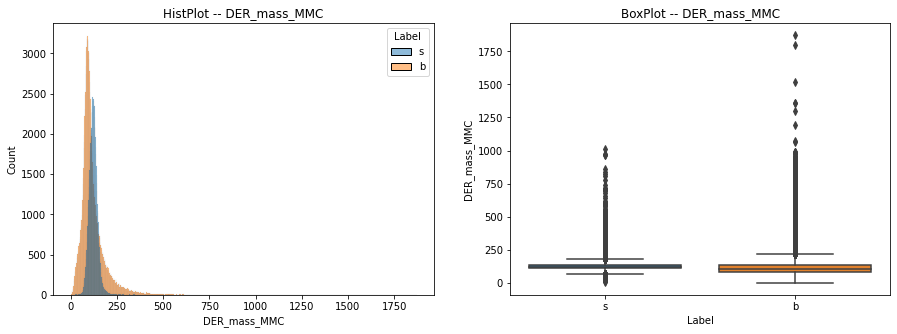

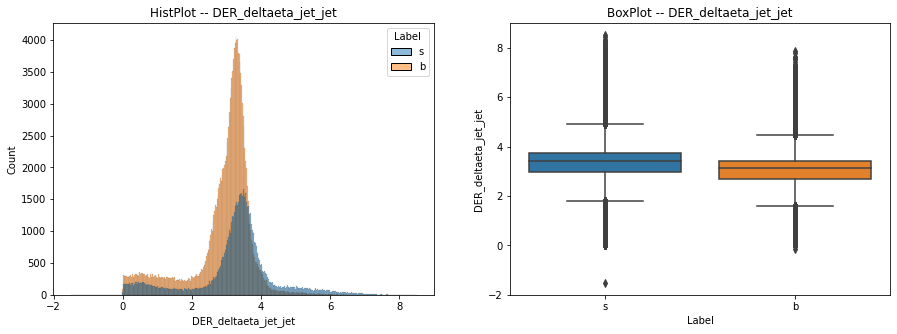

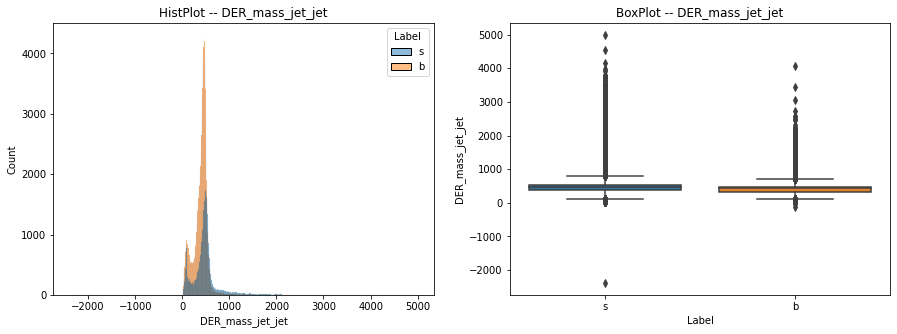

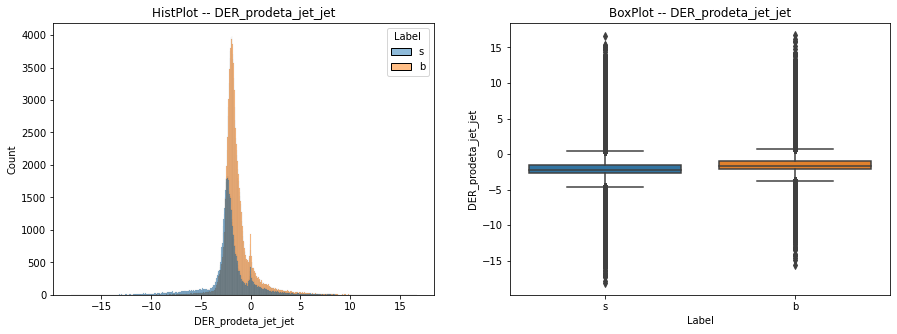

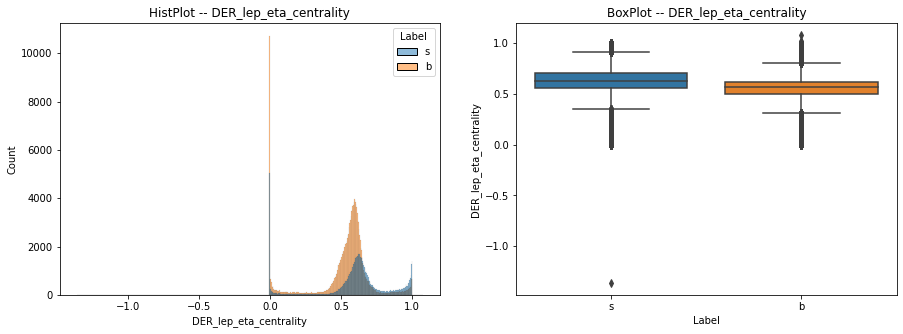

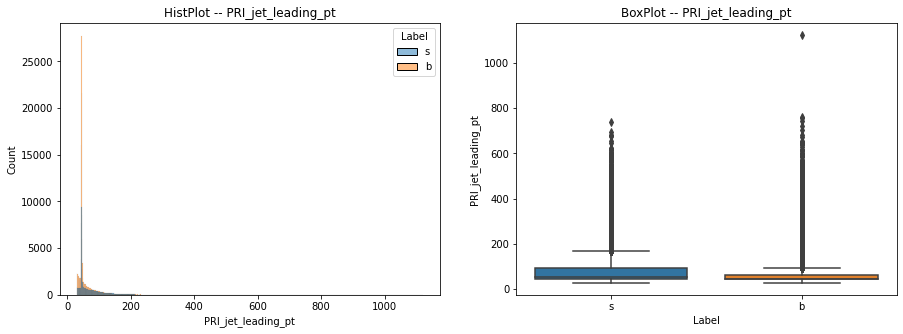

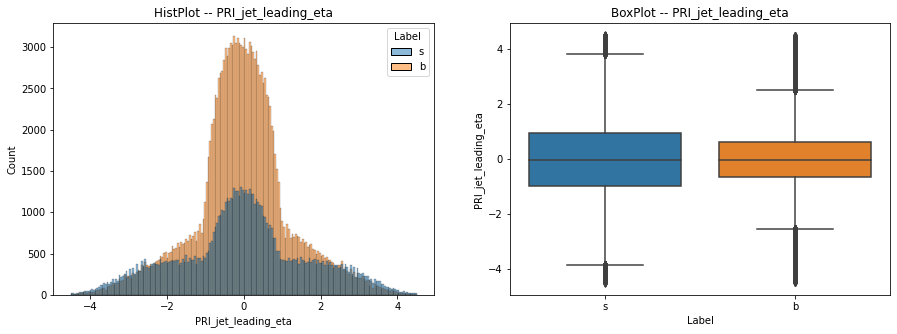

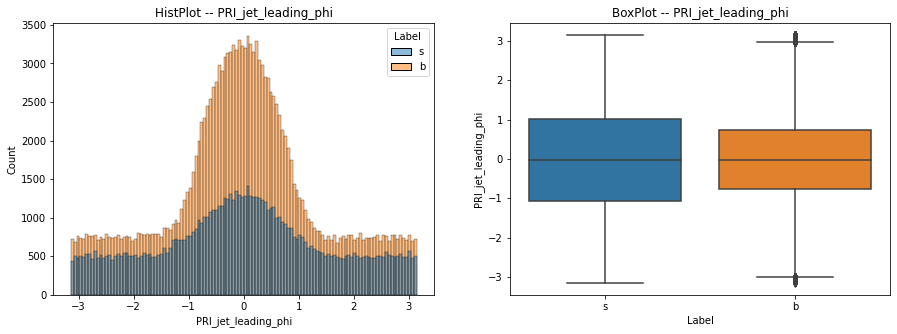

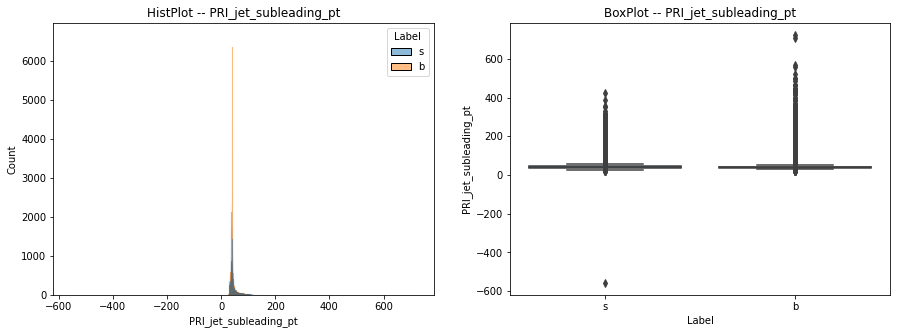

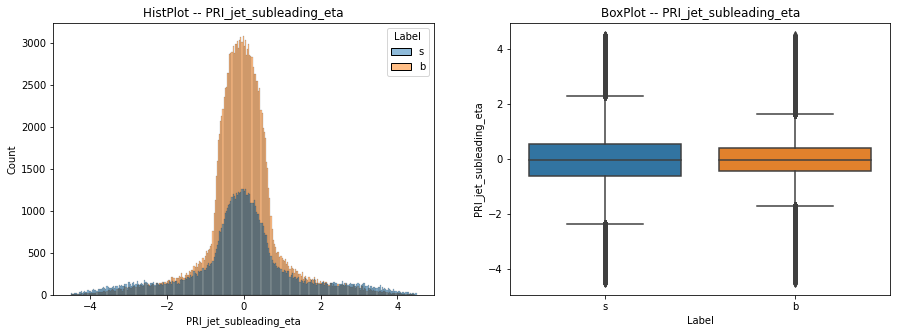

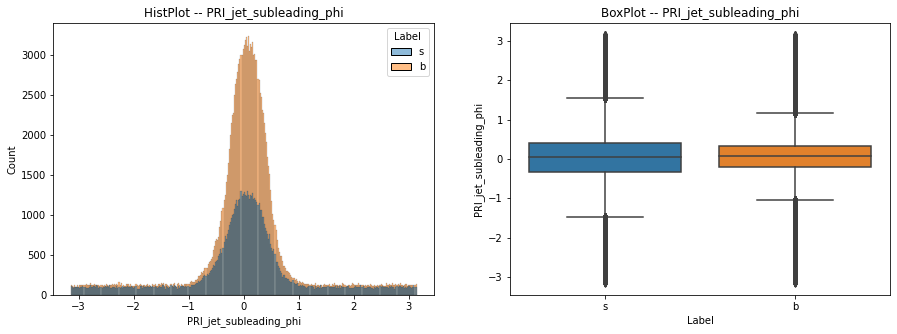

In [80]:
df1 = pd.read_csv('../data/interim/train_MICE_median_ind.csv')
[generate_viz(df1, i) for i in null_union]

In [81]:
# df1 = pd.read_csv('../data/interim/train_SimpleImputer_mean_ind.csv')
# [generate_viz(df1, i) for i in null_union]

In [82]:
# df1 = pd.read_csv('../data/interim/train_SimpleImputer_median_ind.csv')
# [generate_viz(df1, i) for i in null_union]

## Checking for high correlation in entire dataset (> 0.9 or < - 0.9):

With deal with high correlation on a later date.

In [83]:
df1 = pd.read_csv('../data/interim/train_MICE_median_ind.csv')
dfcorr = df1.corr() 
dfcorr1 = dfcorr[((dfcorr > 0.9) & (dfcorr<1.0)) | (dfcorr < -0.9)]
dfcorr1.dropna(how='all', inplace=True)
dfcorr1.dropna(axis=1, how='all', inplace=True)
dfcorr1

,DER_mass_MMC,DER_mass_vis,DER_sum_pt,PRI_met_sumet,PRI_jet_all_pt
DER_mass_MMC,NaN,0.9275,NaN,NaN,NaN
DER_mass_vis,0.9275,NaN,NaN,NaN,NaN
DER_sum_pt,NaN,NaN,NaN,0.904481,0.965628
PRI_met_sumet,NaN,NaN,0.904481,NaN,NaN
PRI_jet_all_pt,NaN,NaN,0.965628,NaN,NaN


## Transforming Data to Normal Distribution:

**Note**: Since the data is not normally distributed, StandardScalar, MinMaxScaler, RobustScaler, MaxScaler will not be usefull.

### PowerTransformer:

In [84]:
from sklearn.preprocessing import PowerTransformer

In [85]:
# Loding Data
df1 = pd.read_csv('../data/interim/train_MICE_median_ind.csv')
df1_test = pd.read_csv('../data/interim/test_MICE_median_ind.csv')

In [91]:
# Transformer
pt = PowerTransformer(method='yeo-johnson')

# Training set
train_temp = pd.DataFrame(pt.fit_transform(df1.iloc[:, :-5]), 
                         columns=df1.columns[:-5])

# Test set
test_temp = pd.DataFrame(pt.transform(df1_test.iloc[:, :-3]), 
                         columns=df1_test.columns[:-3])

train_temp[['ind_15', 'ind_40', 'ind_70']] = train_temp_ind
test_temp[['ind_15', 'ind_40', 'ind_70']] = test_temp_ind
train_temp[['Weight', 'Label']] = df1[['Weight', 'Label']]

# Save data
train_temp.to_csv('../data/interim/train_MICE_median_ind_PowerTransformer.csv', index=False)
test_temp.to_csv('../data/interim/test_MICE_median_ind_PowerTransformer.csv', index=False)

In [94]:
#EDA using Autoviz
sweet_report = sv.analyze(train_temp)

#Saving results to HTML file
# sweet_report.show_html("/content/drive/MyDrive/HR Analytics EDA Analysis/output_sweetViz.html")  // for drive
sweet_report.show_html("../reports/op_sv_PowerTransformer.html")

# Open the following URL in browser to see report:
# file:///C:/Users/DEEPANKAR%20MULLICK/Desktop/higgs_boson/reports/op_sv_PowerTransformer.html

                                             |                                             | [  0%]   00:00 ->…

Report ../reports/op_sv_PowerTransformer.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### QuantileTransformer:

In [97]:
from sklearn.preprocessing import QuantileTransformer

In [98]:
# Loding Data
df1 = pd.read_csv('../data/interim/train_MICE_median_ind.csv')
df1_test = pd.read_csv('../data/interim/test_MICE_median_ind.csv')

In [99]:
# Transformer
qt = QuantileTransformer(output_distribution='normal')


# Training set
train_temp = pd.DataFrame(qt.fit_transform(df1.iloc[:, :-5]), 
                          columns=df1.columns[:-5])


# Test set
test_temp = pd.DataFrame(qt.transform(df1_test.iloc[:, :-3]) , columns=df1_test.columns[:-3])

train_temp[['ind_15', 'ind_40', 'ind_70']] = train_temp_ind
test_temp[['ind_15', 'ind_40', 'ind_70']] = test_temp_ind
train_temp[['Weight', 'Label']] = df1[['Weight', 'Label']]

# Save data
train_temp.to_csv('../data/interim/train_MICE_median_ind_QuantileTransformer.csv', index=False)
test_temp.to_csv('../data/interim/test_MICE_median_ind_QuantileTransformer.csv', index=False)

In [102]:
#EDA using Autoviz
sweet_report = sv.analyze(train_temp)

#Saving results to HTML file
# sweet_report.show_html("/content/drive/MyDrive/HR Analytics EDA Analysis/output_sweetViz.html")  // for drive
sweet_report.show_html("../reports/op_sv_QuantileTransformer.html")

# Open the following URL in browser to see report:
# file:///C:/Users/DEEPANKAR%20MULLICK/Desktop/higgs_boson/reports/op_sv_QuantileTransformer.html

                                             |                                             | [  0%]   00:00 ->…

Report ../reports/op_sv_QuantileTransformer.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
